**Introduction**

Cardiovascular disease can take many forms: high blood pressure, coronary artery disease, valvular heart disease, stroke, or arrhythmias (irregular heartbeat). According to the World Health Organization, cardiovascular disease causes more than 17 million deaths in the world each year and is responsible for half of all deaths in the United States.

Coronary artery disease, the most common form of cardiovascular disease, is the leading cause of death in America today. Cancer, the second largest killer, accounts for a little more than half as many deaths.

In the United States, more than 80 million Americans have some form of cardiovascular disease. But thanks to many studies involving thousands of patients, researchers have identified certain factors that play important roles in a person’s chances of developing heart disease. These are called risk factors.

Risk factors are divided into two categories: major and contributing. Major risk factors  have been proven to increase your risk of heart disease. Contributing risk factors can lead to an increased risk of heart disease.

The more risk factors you have, the more likely you are to develop heart disease. Some risk factors can be changed, treated, or modified, and some cannot. But by controlling as many risk factors as possible through lifestyle changes, medicines, or both, you can reduce your risk of heart disease.

In [1]:
!pip install tensorflow-addons

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import zipfile
path_to_zip_file = './BRFSS.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall('./')

In [4]:
survey_df = pd.read_csv('brfss_data.csv', low_memory=False)
survey_df.head() #print the first five rows in the dataset 

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,1042020,1,4,2020,1100.0,2020000001,2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,2072020,2,7,2020,1200.0,2020000002,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1.0,1.0,1232020,1,23,2020,1100.0,2020000003,2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1.0,1.0,1092020,1,9,2020,1100.0,2020000004,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1.0,1.0,1042020,1,4,2020,1100.0,2020000005,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [5]:
survey_df.shape #there are 40k rows and 279 features in the data 

(401958, 279)

In [6]:
print(survey_df.columns.tolist()) #these are 279 features in the dataset.

['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHONE', 'LADULT1', 'COLGSEX', 'NUMADULT', 'LANDSEX', 'NUMMEN', 'NUMWOMEN', 'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'EXERANY2', 'SLEPTIM1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD2', 'HAVARTH4', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'DIABAGE3', 'LASTDEN4', 'RMVTETH4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL3', 'NUMPHON3', 'CPDEMO1B', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK3', 'DRNK3GE5', 'MAXDRNKS', 'FLUSHOT7', 'FLSHTMY3', 'SHINGLE2', 

According to Texas Heart Institute, As disscussed above, the major risk factors which has proven to increases the risk of heart diseases are: 

**High Blood Pressure (Hypertension)**- High blood pressure increases your risk of heart disease, heart attack, and stroke. If you are obese, smoke, or have high blood cholesterol levels along with high blood pressure, your risk of heart disease or stroke greatly increases. 
Blood pressure can vary with activity and age, but a normal reading for a healthy adult who is resting should be 120/80.

**Diabetes**-Heart problems are the leading cause of death among people with diabetes, especially in the case of adult-onset or Type 2 diabetes (also known as non-insulin-dependent diabetes). Certain racial and ethnic groups (African Americans, Hispanics, Asian and Pacific Islanders, and Native Americans) have a greater risk of developing diabetes. The American Heart Association estimates that 65% of patients with diabetes die of some form of cardiovascular disease.

**Obesity and Overweight**-Extra weight can lead to increased high cholesterol levels, high blood pressure, and diabetes, all major  risk factors for heart disease.

Doctors measure obesity in terms of body mass index (BMI), which is a formula of kilograms divided by height in meters squared (BMI =W [kg]/H [m2]). According to the National Heart, Lung, and Blood Institute (NHLBI), being overweight is defined as having a BMI over 25. Those with a number over 30 are considered obese. You can find out your BMI by using the calculator below. Then, take that value and find your body composition in the table below the calculator.

**Smoking**- Most people know that cigarette and tobacco smoking increases your risk of lung cancer, but few realize that it also greatly increases the risk of heart disease and peripheral vascular disease (disease in the vessels that supply blood to the arms and legs). According to the American Heart Association, more than 480,000 Americans die each year of smoking-related illnesses. Many of these deaths are because of the effects of smoking on the heart and blood vessels.

Smoking increases heart rate, tightens major arteries, and can create irregularities in the timing of heartbeats, all of which make your heart work harder. Smoking also raises blood pressure, another major risk factor. Although nicotine is the main active agent in cigarette smoke, other chemicals and compounds like tar and carbon monoxide are also harmful to your heart in many ways.

**Physical Inactivity**-People who are not active have a greater risk of heart attack than do people who exercise regularly. Exercise burns calories to help maintain a healthy weight, helps to control cholesterol levels and diabetes, and may lower blood pressure. Exercise also strengthens the heart muscle and makes the arteries more flexible. Those who actively burn 500 to 3500 calories per week, either at work or through exercise, can expect to live longer than people who do not exercise. Even moderate-intensity exercise is helpful if done regularly.

**Gender**- Overall, men have a higher risk of heart attack than women. But the difference narrows after women reach menopause. After the age of 65, the risk of heart disease is about the same between the sexes when other risk factors are similar. Cardiovascular diseases affect more women than men and heart attacks are generally more severe in women than in men.

**Heredity**- Heart disease tends to run in families. For example, if your parents or siblings had a heart or circulatory problem before age 55, then you are at greater risk for heart disease than someone who does not have that family history. Risk factors (including high blood pressure, diabetes, and obesity) may also be passed from one generation to another.

Some forms of cardiovascular disease are more common among certain racial and ethnic groups. For example, studies have shown that African Americans have more severe high blood pressure and a greater risk of heart disease than Caucasians.

**Age**- Older age is a risk factor for heart disease. In fact, about 4 of every 5 deaths due to heart disease occur in people older than 65. As we age, our hearts tend not to work as well. The heart’s walls may thicken and arteries may stiffen and harden, making the heart less able to pump blood to the muscles of the body. Because of these changes, the risk of developing cardiovascular disease increases with age. Because of their sex hormones, women are usually protected from heart disease until menopause, when their risk increases.

**Contributing Risk Factors**


**Stress**-Stress is considered a contributing risk factor for heart disease. The effects of emotional stress, behavior habits, and socioeconomic status on the risk of heart disease and heart attack are still being studied.

**Sex hormones**- Sex hormones appear to play a role in heart disease. Among women younger than 40, heart disease is rare. But between the ages 40 and 65, around the time when most women go through menopause, the chances that a woman will have a heart attack greatly increase. From 65 onward, women make up about half of all heart attack victims.\

**Birth control pills**- Early types of birth control pills contained high levels of estrogen and progestin, and taking these pills increased the risk of heart disease and stroke, especially in women older than 35 who smoked. But birth control pills today contain much lower doses of hormones and are considered safe for women younger than 35 who do not smoke or have high blood pressure.

**Alcohol**- But drinking more than a moderate amount of alcohol can cause heart-related problems such as high blood pressure, stroke, irregular heartbeats, and cardiomyopathy (disease of the heart muscle).

Source Link: https://www.texasheart.org/heart-health/heart-information-center/topics/heart-disease-risk-factors/


According to the National Library of Medicine,

There other factor which contributes to the risk of heart dieseases are:

Coronary Heart Disease, Stroke,  myocardial infarction (Heart Attack)  as target feature.

Source Link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5686931/



#### Problem Statement

- The main goal of this project is an estimation of the risks of heart attacks for new members of the medical process society.

We can generate and add these factors according to the dataset features by our own data and check the accuracy of our model. 

Let's take the influencing factors from the dataset.

Diabetes -> DIABETE4

Obesity and Overweight -> _RFBMI5

Smoking -> _SMOKER3

Physical Inactivity -> _TOTINDA

Gender -> SEXVAR

Heredity -> _IMPRACE

Age -> _AGE65YR

Alcohol -> DRNKANY5

Coronary Heart Disease -> CVDCRHD4

Stroke -> CVDSTRK3

Heart Attack -> CVDINFR4

In [7]:
survey_selected_df = survey_df[['SEXVAR', '_IMPRACE', '_AGE65YR', 'GENHLTH', '_RFBMI5', '_TOTINDA', '_SMOKER3', 'DRNKANY5', 'DIABETE4', 'CVDSTRK3', 'CVDCRHD4', 'CVDINFR4']]
survey_selected_df.head() #These are the columns which majorily affect the risk of heart desease.

,SEXVAR,_IMPRACE,_AGE65YR,GENHLTH,_RFBMI5,_TOTINDA,_SMOKER3,DRNKANY5,DIABETE4,CVDSTRK3,CVDCRHD4,CVDINFR4
0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
1,2.0,2.0,2.0,3.0,2.0,1.0,9.0,9.0,3.0,2.0,2.0,2.0
2,2.0,2.0,2.0,3.0,9.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0
3,2.0,1.0,2.0,1.0,9.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,3.0,1.0,2.0,2.0


In [8]:
survey_selected_df.columns

Index(['SEXVAR', '_IMPRACE', '_AGE65YR', 'GENHLTH', '_RFBMI5', '_TOTINDA',
       '_SMOKER3', 'DRNKANY5', 'DIABETE4', 'CVDSTRK3', 'CVDCRHD4', 'CVDINFR4'],
      dtype='object')

In [9]:
#Renaming the columns for better understanding
survey_selected_df.rename(columns={'SEXVAR': 'Gender',
                                   '_IMPRACE':'Race', 
                                   '_AGE65YR': 'AGE above 65', 
                                   'GENHLTH' : 'General Health', 
                                   '_RFBMI5': 'Over Weight',
                                   'DRNKANY5':'Alcohol Usage',
                                   '_TOTINDA':'Physical Active Status',
                                   '_SMOKER3':'Smoking',
                                   'DIABETE4':'Diabetes',
                                   'CVDSTRK3':'stroke',
                                   'CVDCRHD4':'Coronary Heart Disease',
                                   'CVDINFR4':'Heart Attack'},inplace=True) 

/Users/sraharsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
survey_selected_df.columns

Index(['Gender', 'Race', 'AGE above 65', 'General Health', 'Over Weight',
       'Physical Active Status', 'Smoking', 'Alcohol Usage', 'Diabetes',
       'stroke', 'Coronary Heart Disease', 'Heart Attack'],
      dtype='object')

**Checking the Missing Values in the data**

In [11]:
survey_selected_df.isnull().sum() #There are very less missing values in the dataset.

Gender                    0
Race                      0
AGE above 65              0
General Health            8
Over Weight               0
Physical Active Status    0
Smoking                   0
Alcohol Usage             0
Diabetes                  6
stroke                    3
Coronary Heart Disease    3
Heart Attack              6
dtype: int64

We have missing values in Diabetes, Stroke and Heart Attack.

In [12]:
survey_selected_df.dropna(inplace=True) #dropping na values 

/Users/sraharsh/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
survey_selected_df.columns

Index(['Gender', 'Race', 'AGE above 65', 'General Health', 'Over Weight',
       'Physical Active Status', 'Smoking', 'Alcohol Usage', 'Diabetes',
       'stroke', 'Coronary Heart Disease', 'Heart Attack'],
      dtype='object')

**Data Cleaning and Exploration**

**Feature : Gender**

1- Male 

2- Female 

Most of the Application forms and Google forms have 1st option as Male and 2nd option as Female. So, we have assume these options.

Gender 
 2.0    54.238899
1.0    45.761101
Name: Gender, dtype: float64


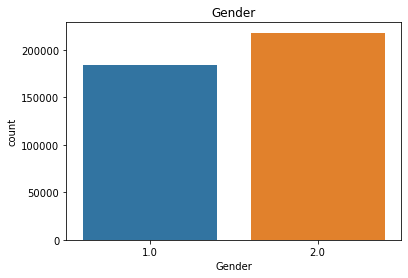

In [14]:
print("Gender \n",(survey_selected_df['Gender'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Gender', data=survey_selected_df) 
plt.title('Gender')
plt.show() 



*   There are 45% Male and 54% female in Gender column.
*  Female are 9% more than male. 



**Feature: Race Information**


1 - White

2 - Black

3 - Asian

4 - American Indian/Alaskan Native

5 - Hispanic

6 - Other race

This information we also got from the Application forms.


Race in %age:
 1.0    75.601079
5.0     9.057978
2.0     7.560755
6.0     3.501980
3.0     2.548365
4.0     1.729843
Name: Race, dtype: float64


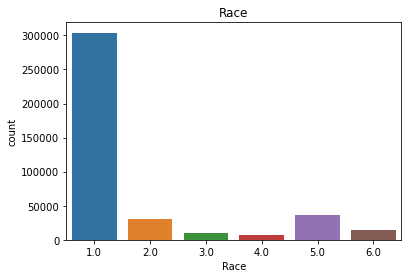

In [15]:
print("Race in %age:\n",(survey_selected_df['Race'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Race', data=survey_selected_df) 
plt.title('Race')
plt.show() 

In the data most of the participants in White followed by Hispanic community.

**Feature : Age above 65**

Mostly in many pension related forms the option of above 65 or less in asked in "Yes" or "No" format.

Here we are assuming:

1- Below 65 

2- Above 65

3- May be age is not disclosed.


AGE above 65 %age:
 1.0    63.713104
2.0    34.234122
3.0     2.052774
Name: AGE above 65, dtype: float64


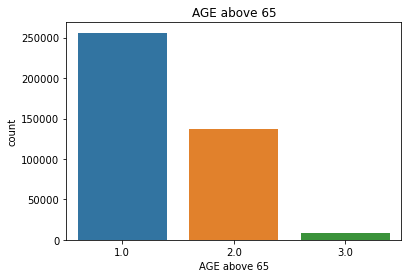

In [16]:
print("AGE above 65 %age:\n",(survey_selected_df['AGE above 65'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='AGE above 65', data=survey_selected_df) 
plt.title('AGE above 65')
plt.show()  

We can see that lot of people are below 65 age which is almost 64% in the data and 34% are the above 65 age.  

Since option 3 doesn't make any sense we are removing it.

In [17]:
survey_selected_df.drop(survey_selected_df[survey_selected_df['AGE above 65'] == 3].index, inplace = True)  #removed the rows which has age as option 3 

/Users/sraharsh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Let's check the Age above 65 feature with gender feature

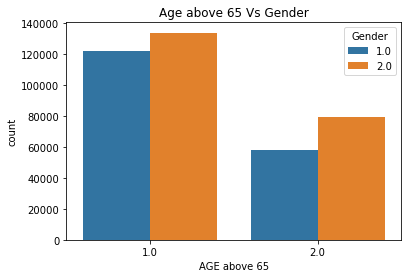

In [18]:
sns.countplot(x='AGE above 65', hue='Gender', data=survey_selected_df)
plt.title('Age above 65 Vs Gender')
plt.show()


We can see females participants are more in both below and above 65 age.

In [19]:
survey_selected_df.columns

Index(['Gender', 'Race', 'AGE above 65', 'General Health', 'Over Weight',
       'Physical Active Status', 'Smoking', 'Alcohol Usage', 'Diabetes',
       'stroke', 'Coronary Heart Disease', 'Heart Attack'],
      dtype='object')

**Feature- General health information**

1 - excellent

2 - very good

3 - good

4 - fair

5 - poor

7 and 9 - Don’t know/Not Sure/Refused

General Health:
 2.0    34.380342
3.0    29.704110
1.0    20.249789
4.0    11.572977
5.0     3.868497
7.0     0.159261
9.0     0.065025
Name: General Health, dtype: float64


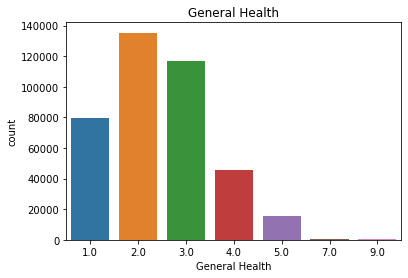

In [20]:
print("General Health:\n",(survey_selected_df['General Health'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='General Health', data=survey_selected_df) 
plt.title('General Health')
plt.show()  


Most of the participants have,

Option 2:"Very Good" as health condition almost (34%) followed by

Option 3:"Good" as health condition almost (30%) followed by 

Option 1:"Excellent" as health condition around (20%).


Let's drop 7 and 9 as they're uncertain option.

In [21]:
survey_selected_df=survey_selected_df[(survey_selected_df['General Health'] != 7) & (survey_selected_df['General Health'] != 9)]

In [22]:
survey_selected_df['General Health'].value_counts() # removed 7 and 9 options from dataset

2.0    135353
3.0    116943
1.0     79722
4.0     45562
5.0     15230
Name: General Health, dtype: int64

Let's check  General Health with Gender.

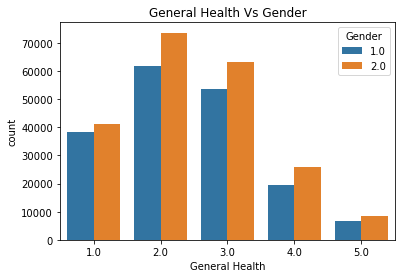

In [23]:
sns.countplot(x='General Health', hue='Gender', data=survey_selected_df)
plt.title('General Health Vs Gender')
plt.show()

We can see that health condition of female is more in every option of health. This is because female participants are more.

In [24]:
survey_selected_df.columns

Index(['Gender', 'Race', 'AGE above 65', 'General Health', 'Over Weight',
       'Physical Active Status', 'Smoking', 'Alcohol Usage', 'Diabetes',
       'stroke', 'Coronary Heart Disease', 'Heart Attack'],
      dtype='object')

  Feature : Over weight

  we can tell overweight using the BMI score.

1: BMI score less than 25.

2: BMI score above than 25.

9: Missing Value in the data.



Over Weight:
 2.0    61.487997
1.0    29.086327
9.0     9.425677
Name: Over Weight, dtype: float64


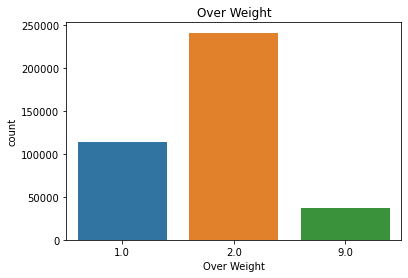

In [25]:
print("Over Weight:\n",(survey_selected_df['Over Weight'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Over Weight', data=survey_selected_df) 
plt.title('Over Weight')
plt.show()  




*   There are lot of people whose BMI score more than 25, option-2.It's almost 61% in the data. 

*   There are almost 10% of missing value in the over weight feature.



We'll drop the option 9 from overweight features.

In [26]:
survey_selected_df.drop(survey_selected_df[survey_selected_df['Over Weight'] == 9].index, inplace = True)

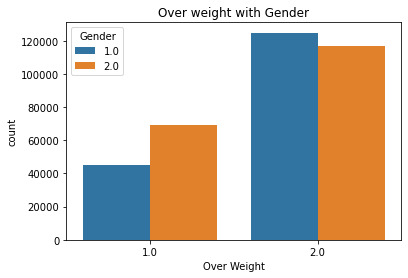

In [27]:
sns.countplot(x='Over Weight', hue='Gender', data=survey_selected_df)
plt.title('Over weight with Gender')
plt.show()

In [28]:
survey_selected_df.columns

Index(['Gender', 'Race', 'AGE above 65', 'General Health', 'Over Weight',
       'Physical Active Status', 'Smoking', 'Alcohol Usage', 'Diabetes',
       'stroke', 'Coronary Heart Disease', 'Heart Attack'],
      dtype='object')

We can observe here that more males are obese (BMI-More than 25) than females. 

**Feature- Physical Active Status** 

1- Regular Physical Active

2- Not doing Regular Physical Active

9- Missing values in the Physical Inactivity feature

Physical Active Status:
 1.0    76.593729
2.0    23.272482
9.0     0.133789
Name: Physical Active Status, dtype: float64


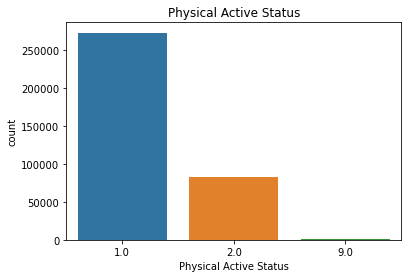

In [29]:
print("Physical Active Status:\n",(survey_selected_df['Physical Active Status'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Physical Active Status', data=survey_selected_df) 
plt.title('Physical Active Status')
plt.show()  



*   76% of people are  physical active.

*   0.1% of data are missing in the data.



Let's drop missing values 

In [30]:
survey_selected_df.drop(survey_selected_df[survey_selected_df['Physical Active Status'] == 9].index, inplace = True)

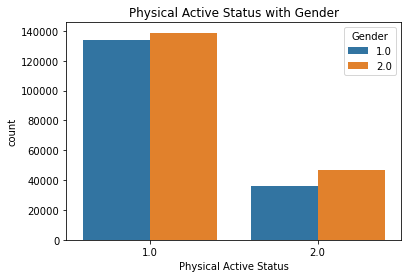

In [31]:
sns.countplot(x='Physical Active Status', hue='Gender', data=survey_selected_df)
plt.title('Physical Active Status with Gender')
plt.show() 


In [32]:
survey_selected_df.columns

Index(['Gender', 'Race', 'AGE above 65', 'General Health', 'Over Weight',
       'Physical Active Status', 'Smoking', 'Alcohol Usage', 'Diabetes',
       'stroke', 'Coronary Heart Disease', 'Heart Attack'],
      dtype='object')

We can observe that, females are more physical active than males.

**Feature: Smoking**

1 - Everyday smoker

2 - Someday smoker

3 - Former smoker

4 - Non-smoker

9 - Don’t know/Not Sure/Refused

In [33]:
survey_selected_df.drop(survey_selected_df[survey_selected_df['Smoking'] == 9].index, inplace = True)



*  We can observe that around 56% of the people in the data are non-smokers (option-4).

*  Around 26% of the people in the data were former smokers.

*  Around 5% of the people in the Smoking data is missing.











Smoking:
 4.0    58.194227
3.0    27.639087
1.0    10.324536
2.0     3.842149
Name: Smoking, dtype: float64


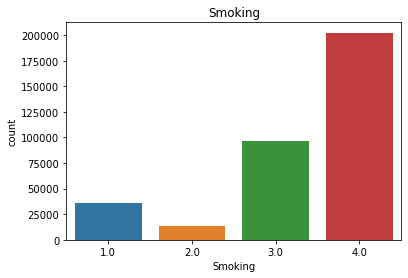

In [34]:
print("Smoking:\n",(survey_selected_df['Smoking'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Smoking', data=survey_selected_df) 
plt.title('Smoking')
plt.show() 

Let's remove the missing data and since effect of casual smokers and regular smokers have the almost impact same on the heart. Let's combine these two options.




These will be our final options in the feature

1 - smoker

2 - former smoker

3 - non-smoker

In [35]:
survey_selected_df.drop(survey_selected_df[survey_selected_df['Smoking'] == 9].index, inplace = True)

In [36]:
change = {2 : 1, 3 : 2, 4 : 3}
survey_selected_df['Smoking'].replace(to_replace=change, inplace=True)

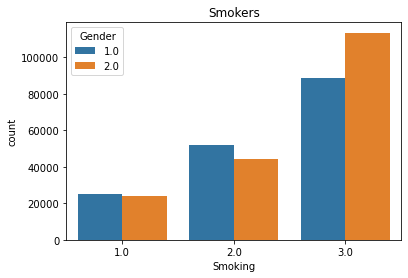

In [37]:
sns.countplot(x='Smoking', hue='Gender', data=survey_selected_df)
plt.title('Smokers')
plt.show()

We can observe that there are more male smokers than female.

**Feature: Alcohol Usage** 

1 - person who consumes alcohol

2 - person who doesn't consumes alcohol 

7 & 9 - missing values and unknown values 


Alcohol Usage:
 1.0    51.302862
2.0    46.885498
9.0     0.987069
7.0     0.824571
Name: Alcohol Usage, dtype: float64


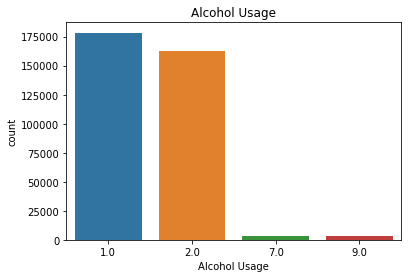

In [38]:
print("Alcohol Usage:\n",(survey_selected_df['Alcohol Usage'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Alcohol Usage', data=survey_selected_df) 
plt.title('Alcohol Usage')
plt.show() 

51% of the people in the data set consumes alcohol and 46 doesn't comsume alochol. 

Around 2% are missing and unknown values.

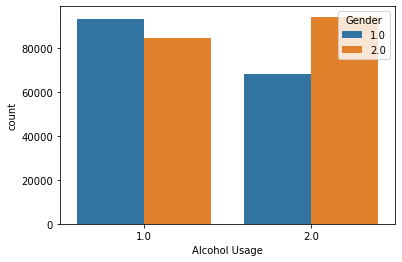

In [39]:
survey_selected_df = survey_selected_df[(survey_selected_df['Alcohol Usage'] != 7) & (survey_selected_df['Alcohol Usage'] != 9)]
sns.countplot(x='Alcohol Usage', hue='Gender', data=survey_selected_df)
plt.show()

We can observe that male consumes more alcohol than females.

**Feature : Alcohol**

1 - Diabetes

2 -  Diabetes but Only During Pregnancy Period just for Female Participants

3 - Not Has Diabetes

4 - Has Pre-diabetes or Borberline Diabetes

7 - Don’t know/Not Sure

9 - Refused

Diabetes :
 3.0    83.765528
1.0    13.114644
4.0     2.193634
2.0     0.799656
7.0     0.108085
9.0     0.018454
Name: Diabetes, dtype: float64


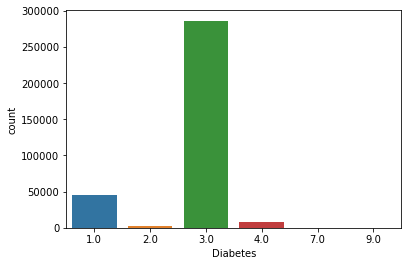

In [40]:
print("Diabetes :\n",(survey_selected_df['Diabetes'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Diabetes', data=survey_selected_df)
plt.show()

Most of the people in the dataset does not have diabetes.

1 and 4 are almost similar which defines diabetes and 2 and 3 are almost similar. We can change values from 4 to 1 and 3 to 2.

Droping out option 7 and 9 from the data.**bold text**

In [41]:
survey_selected_df = survey_selected_df[(survey_selected_df['Diabetes'] != 7) & (survey_selected_df['Diabetes'] != 9)]


In [42]:
chg = {3 : 2, 4 : 1}

survey_selected_df['Diabetes'].replace(to_replace=chg, inplace = True)

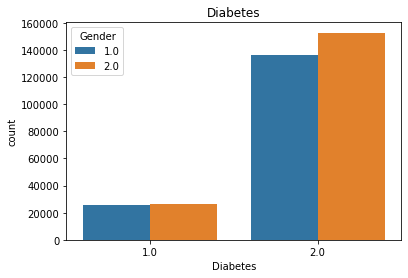

In [43]:
sns.countplot(x='Diabetes', hue='Gender', data=survey_selected_df)
plt.title('Diabetes')
plt.show()

Most of the females doesn't have diabetes.

**Features: Stroke**

1 - had stroke 

2- did not had stroke

7 & 9 - unknown and missing value

Stroke :
 2.0    95.798982
1.0     3.995718
7.0     0.196208
9.0     0.009092
Name: stroke, dtype: float64


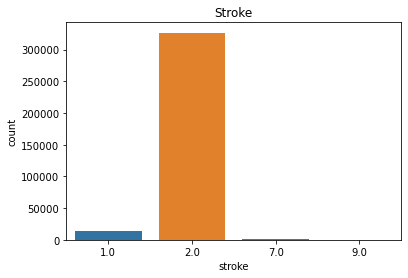

In [44]:
print("Stroke :\n",(survey_selected_df['stroke'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='stroke',data=survey_selected_df)
plt.title('Stroke')
plt.show()



* 95% of the people don't have stroke.





Let's remove 7 and 9 from the data

In [45]:
survey_selected_df = survey_selected_df[(survey_selected_df['stroke'] != 7) & (survey_selected_df['stroke'] != 9)]

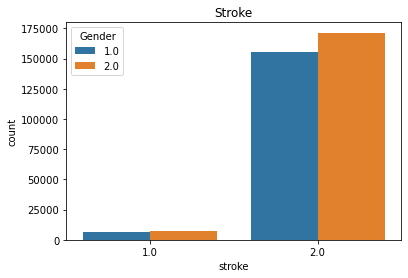

In [46]:
sns.countplot(x='stroke',hue='Gender',data=survey_selected_df)
plt.title('Stroke')
plt.show()

Females didn't get strokes more than males

**Feature: Coronary Heart Disease**

1- Having Coronary Heart Disease

2- Not Having Coronary Heart Disease

7 & 9 - Missing and Unknown values

Coronary Heart Disease :
 2.0    93.459803
1.0     5.843975
7.0     0.682703
9.0     0.013519
Name: Coronary Heart Disease, dtype: float64


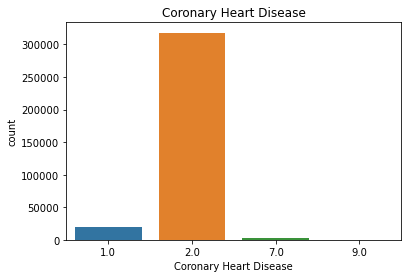

In [47]:
print("Coronary Heart Disease :\n",(survey_selected_df['Coronary Heart Disease'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Coronary Heart Disease', data=survey_selected_df)
plt.title('Coronary Heart Disease')
plt.show()

93% of the people are not having any Coronary Heart Disease

1% of the people have Coronary Heart Disease.

Let's remove 7 and 9 option from the data.

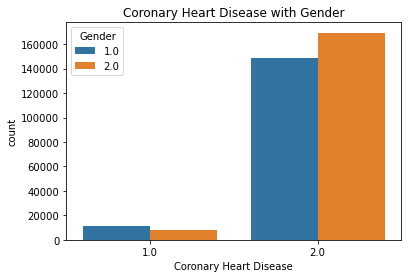

In [48]:
survey_selected_df = survey_selected_df[(survey_selected_df['Coronary Heart Disease'] != 7) & (survey_selected_df['Coronary Heart Disease'] != 9)]

sns.countplot(x='Coronary Heart Disease', hue='Gender', data=survey_selected_df)
plt.title('Coronary Heart Disease with Gender')
plt.show()

More females doesn't have Coronary Heart Disease than men in  data.

**Feature: Heart Attack**

1- Had Heart Attack

2- Not Had Heart Attack

7&9- Missing and Unknown Values

Heart Attack :
 2.0    94.256517
1.0     5.416460
7.0     0.316665
9.0     0.010358
Name: Heart Attack, dtype: float64


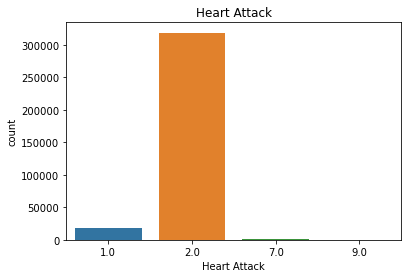

In [49]:
print("Heart Attack :\n",(survey_selected_df['Heart Attack'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Heart Attack', data=survey_selected_df)
plt.title('Heart Attack')
plt.show()

Around 94% of the people doesn't have heart attack in the past.

Onlyb 5% of the people have heart attacks.

Removing 7 & 9 option from the data 

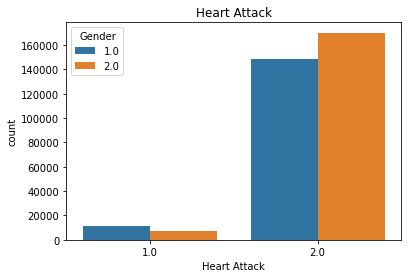

In [50]:
survey_selected_df = survey_selected_df[(survey_selected_df['Heart Attack'] != 7) & (survey_selected_df['Heart Attack'] != 9)]
sns.countplot(x='Heart Attack',hue='Gender',data=survey_selected_df)
plt.title('Heart Attack')
plt.show()

Most of the female doesn't have Heart Attack in the past than the male.

In [51]:
survey_selected_df.columns

Index(['Gender', 'Race', 'AGE above 65', 'General Health', 'Over Weight',
       'Physical Active Status', 'Smoking', 'Alcohol Usage', 'Diabetes',
       'stroke', 'Coronary Heart Disease', 'Heart Attack'],
      dtype='object')

In [52]:
survey_selected_df.head()

,Gender,Race,AGE above 65,General Health,Over Weight,Physical Active Status,Smoking,Alcohol Usage,Diabetes,stroke,Coronary Heart Disease,Heart Attack
0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0,3.0,2.0,2.0,1.0,2.0,2.0
5,1.0,1.0,2.0,4.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
6,2.0,1.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
8,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0


In [53]:
print("Data is Imbalance : \n",survey_selected_df['Heart Attack'].value_counts()/len(survey_selected_df)*100)

Data is Imbalance : 
 2.0    94.565769
1.0     5.434231
Name: Heart Attack, dtype: float64


Only 5% of the data are the people having heart strokes.

In [54]:
# Defining the features and the target of the model
X = survey_selected_df[survey_selected_df.columns[:-1]].values # Features
y = survey_selected_df[survey_selected_df.columns[-1]].values # Target

In [55]:
survey_selected_df_copy = survey_selected_df.copy()

In [56]:
colum=survey_selected_df_copy.drop('Heart Attack',axis=1).columns


In [57]:
target= survey_selected_df_copy.columns 

In [58]:
target_name= target[-1]

**Basline Model**

**Random Forest Classifier**

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
rf_clf = RandomForestClassifier(max_depth=2, random_state=3)
rf_clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=3)

In [60]:

report = classification_report(y, rf_clf.predict(X))
print('Random Classification Report on the Whole Dataset:\n\n',report)

/Users/sraharsh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sraharsh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Classification Report on the Whole Dataset:

               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00     18302
         2.0       0.95      1.00      0.97    318489

    accuracy                           0.95    336791
   macro avg       0.47      0.50      0.49    336791
weighted avg       0.89      0.95      0.92    336791



/Users/sraharsh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see the curse of unbalanced data since we 5% of minor class and 95 % of major it is difficult to classify or evaluat the model

[ 0.91790318  0.10797227  9.20689579 14.02701493  0.          1.05314374
  1.23595655  0.97395829  2.9084585  15.88794937 53.68074738]


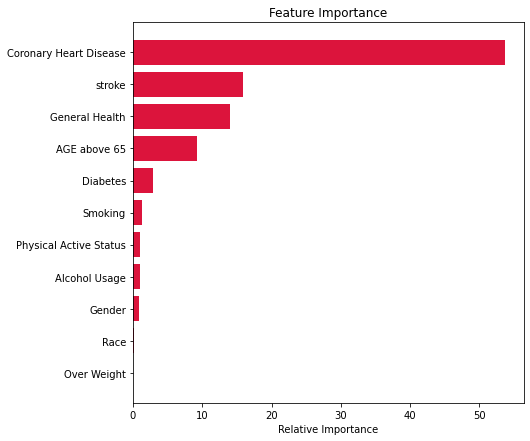

In [61]:
# Calculating the feature importance
feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
print(feature_importance)
# Displaying the relative feature importance by a horizontal bar chart
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, survey_selected_df.columns[:-1][sorted_idx])
plt.show()

We can see Cornary Heart Disease 54% corelated with Heart Stroke.

This is true, coronary artery disease, reduced blood flow to the heart can cause chest pain (angina) and shortness of breath. A complete blockage of blood flow can cause a heart attack.

Link: https://www.mayoclinic.org/diseases-conditions/coronary-artery-disease/symptoms-causes/syc-20350613#:~:text=If%20you%20have%20coronary%20artery,can%20cause%20a%20heart%20attack.

Let's try to upsample the minor class  and feed to the same model. 

**Upsampling the data**

We upsampled the data to handle the imbalance data

In [62]:
survey_selected_df['Heart Attack'] = survey_selected_df['Heart Attack'].replace(2, 0)
print(survey_selected_df['Heart Attack'].value_counts())

0.0    318489
1.0     18302
Name: Heart Attack, dtype: int64


In [63]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = survey_selected_df[(survey_selected_df['Heart Attack']==0)] 
df_minority = survey_selected_df[(survey_selected_df['Heart Attack']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 318489, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [64]:
df_upsampled['Heart Attack'].value_counts() 

1.0    318489
0.0    318489
Name: Heart Attack, dtype: int64

We have balance data now 

In [65]:
X= df_upsampled.drop('Heart Attack',axis=1)
y= df_upsampled['Heart Attack']

**Train/Test split** 

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [67]:
from sklearn.linear_model import LogisticRegression # Importing Logistic Regression from sklearn
logreg = LogisticRegression(penalty = 'none', max_iter = 10000) # Instantiating logistic regression
logreg.fit(X_train, y_train) # Fitting the train data to 'logreg'x

LogisticRegression(max_iter=10000, penalty='none')

In [68]:
# Predicted class for the test subset through logistic regression
y_train_pred_prob = logreg.predict_proba(X_train) # Calculating probabilities of the two classes in train subset
y_test_pred_prob = logreg.predict_proba(X_test) # Calculating probabilities of the two classes in test subset

train_y_pred = y_train_pred_prob.argmax(axis=1) # Finding the predicted class for train predictions
test_y_pred = y_test_pred_prob.argmax(axis=1) # Finding the predicted class for test predictions



In [69]:
 # Calculating the train and test accuracy scores of the model
from sklearn import metrics # Importing 'metrics' from sklearn
train_score = metrics.accuracy_score(y_train, train_y_pred) # train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # test accuracy
print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.79363 

Test accuracy score of the model is  0.79305


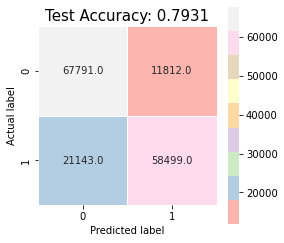

In [70]:
# Computing the confusion matrix for the test subset
test_c_matrix = confusion_matrix(y_test, test_y_pred) # Compute the test confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()



In [71]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('Logistic Regression Train Classification Report: \n\n', train_report,'\n\n')
print('Logistic Regression Test Classification Report: \n\n', test_report)

Logistic Regression Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.76      0.85      0.81    238886
         1.0       0.83      0.73      0.78    238847

    accuracy                           0.79    477733
   macro avg       0.80      0.79      0.79    477733
weighted avg       0.80      0.79      0.79    477733
 


Logistic Regression Test Classification Report: 

               precision    recall  f1-score   support

         0.0       0.76      0.85      0.80     79603
         1.0       0.83      0.73      0.78     79642

    accuracy                           0.79    159245
   macro avg       0.80      0.79      0.79    159245
weighted avg       0.80      0.79      0.79    159245



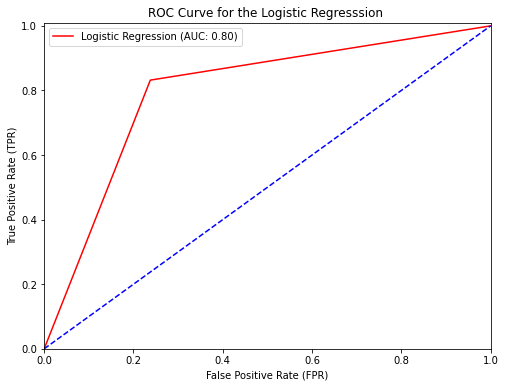

In [72]:
from sklearn.metrics import roc_curve, auc # Importing 'roc_curve' and 'auc' 
fpr, tpr, thresholds = roc_curve(test_y_pred, y_test) # Computing ROC for the test subset
auc(fpr, tpr) # Computing AUC for the test subset
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='Logistic Regression (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Logistic Regresssion ')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

Model 2: K-Nearest Neighbour

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
train_y_pred = knn.predict(X_train)
test_y_pred = knn.predict(X_test)

In [74]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('K-Nearest Neighbour Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('K-Nearest Neighbour Classifier Test Classification Report: \n\n', test_report)

K-Nearest Neighbour Classifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.71      0.89      0.79    238886
         1.0       0.85      0.63      0.72    238847

    accuracy                           0.76    477733
   macro avg       0.78      0.76      0.75    477733
weighted avg       0.78      0.76      0.75    477733
 


K-Nearest Neighbour Classifier Test Classification Report: 

               precision    recall  f1-score   support

         0.0       0.70      0.88      0.78     79603
         1.0       0.84      0.63      0.72     79642

    accuracy                           0.76    159245
   macro avg       0.77      0.76      0.75    159245
weighted avg       0.77      0.76      0.75    159245



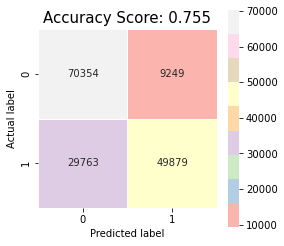

In [75]:
log_matrix = confusion_matrix(y_test, test_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(log_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

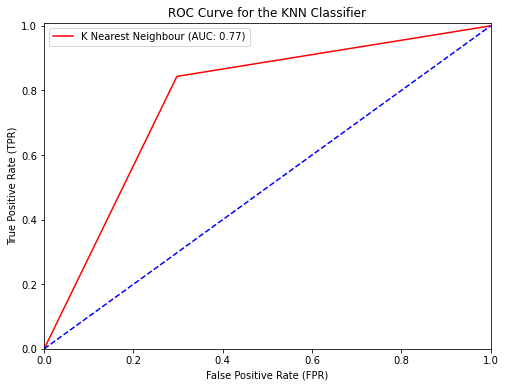

In [76]:
from sklearn.metrics import roc_curve, auc # Importing 'roc_curve' and 'auc' 
fpr, tpr, thresholds = roc_curve(test_y_pred, y_test) # Computing ROC for the test subset
auc(fpr, tpr) # Computing AUC for the test subset
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='K Nearest Neighbour (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the KNN Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

**Model 1: Random Forest Classifier with balance data**

In [77]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
rf_clf = RandomForestClassifier(max_depth=2, random_state=3)
rf_clf.fit(X_train, y_train)
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [79]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.75      0.85      0.80    238886
         1.0       0.83      0.72      0.77    238847

    accuracy                           0.78    477733
   macro avg       0.79      0.78      0.78    477733
weighted avg       0.79      0.78      0.78    477733
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

         0.0       0.75      0.85      0.80     79603
         1.0       0.83      0.72      0.77     79642

    accuracy                           0.79    159245
   macro avg       0.79      0.79      0.78    159245
weighted avg       0.79      0.79      0.78    159245



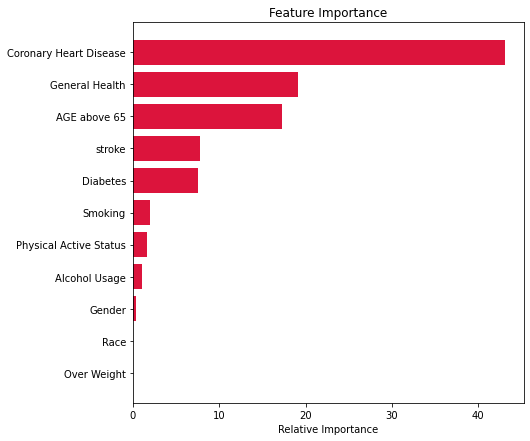

In [80]:
# Calculating the feature importance
feature_importance = rf_clf.feature_importances_
feature_importance = 100.0*(feature_importance/np.sum(feature_importance))
# Displaying the relative feature importance by a horizontal bar chart
sorted_idx = np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0])+0.5
plt.figure(figsize=(7, 7))
plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
plt.yticks(pos, survey_selected_df.columns[:-1][sorted_idx])
plt.show()

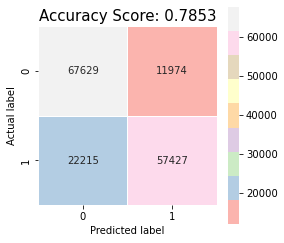

In [81]:
log_matrix = confusion_matrix(y_test, test_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(log_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

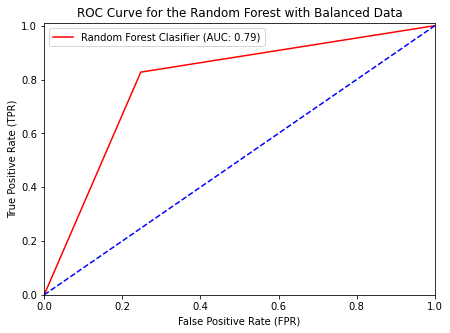

In [82]:
from sklearn.metrics import roc_curve, auc # Importing 'roc_curve' and 'auc' 
fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)
auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='Random Forest Clasifier (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Random Forest with Balanced Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

As we have seen previously how important coronary heart disease feature to lead to heart attack.

Model 2: **XG Boost Classifier**

Let us see how XGBoost is implemented in the current case.

In [83]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [84]:
import xgboost as xgb
xg_class = xgb.XGBClassifier()
xg_class.fit(X_train, y_train)
train_y_pred = xg_class.predict(X_train)
test_y_pred = xg_class.predict(X_test)


In [85]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('XG Boost Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('XG Boost Classifier Test Classification Report: \n\n', test_report)

XG Boost Classifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81    238886
         1.0       0.82      0.78      0.80    238847

    accuracy                           0.81    477733
   macro avg       0.81      0.81      0.80    477733
weighted avg       0.81      0.81      0.80    477733
 


XG Boost Classifier Test Classification Report: 

               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81     79603
         1.0       0.82      0.78      0.80     79642

    accuracy                           0.80    159245
   macro avg       0.80      0.80      0.80    159245
weighted avg       0.80      0.80      0.80    159245



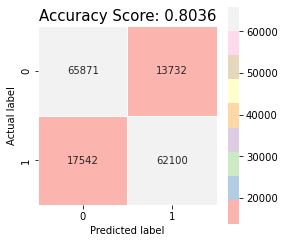

In [86]:
log_matrix = confusion_matrix(y_test, test_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(log_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

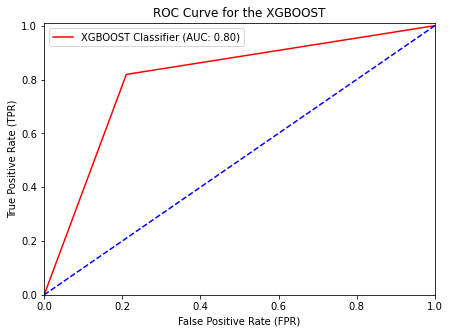

In [87]:
from sklearn.metrics import roc_curve, auc # Importing 'roc_curve' and 'auc' 
fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)
auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='XGBOOST Classifier (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the XGBOOST')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

Let's take top 4 features from the dataset.



'Coronary Heart Disease', 'General Health', 'AGE above 65', 'Stroke'

In [88]:
X= df_upsampled[['Coronary Heart Disease', 'General Health', 'AGE above 65', 'stroke']]
y= df_upsampled['Heart Attack']


In [89]:
df_upsampled['Heart Attack'].value_counts()

1.0    318489
0.0    318489
Name: Heart Attack, dtype: int64

**Model 4: Decision Tree Classifier**

In [90]:
from sklearn import tree

In [91]:
# Constructing tree classifier with no specified hyperparameters
tr_clf = tree.DecisionTreeClassifier()
tr_clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [92]:
# Finding the predictions of tree classifier for train and test subsets
train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)

In [93]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Decision Tree Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82    238886
         1.0       0.83      0.81      0.82    238847

    accuracy                           0.82    477733
   macro avg       0.82      0.82      0.82    477733
weighted avg       0.82      0.82      0.82    477733
 


Decision Tree Test Classification Report: 

               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82     79603
         1.0       0.82      0.81      0.81     79642

    accuracy                           0.82    159245
   macro avg       0.82      0.82      0.82    159245
weighted avg       0.82      0.82      0.82    159245



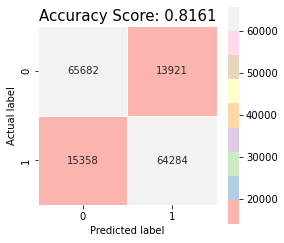

In [94]:
log_matrix = confusion_matrix(y_test, test_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(log_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

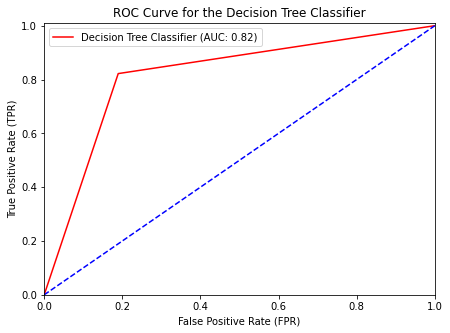

In [95]:
from sklearn.metrics import roc_curve, auc # Importing 'roc_curve' and 'auc' 
fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)
auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='Decision Tree Classifier (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Decision Tree Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

Let's try Adaboost Classifier 

In [96]:
from sklearn.ensemble import AdaBoostClassifier
# Instantiating the AdaBoostClassifier with 500 sequential trees
adab_clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_leaf_nodes=10),n_estimators=500, learning_rate=1.5, random_state=0)
adab_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=10),
                   learning_rate=1.5, n_estimators=500, random_state=0)

In [97]:
train_y_pred = adab_clf.predict(X_train)
test_y_pred = adab_clf.predict(X_test)

In [98]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('AdaBoost Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('AdaBoost Classifier Test Classification Report: \n\n', test_report)

AdaBoost Classifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.79      0.84      0.81    238886
         1.0       0.83      0.78      0.80    238847

    accuracy                           0.81    477733
   macro avg       0.81      0.81      0.81    477733
weighted avg       0.81      0.81      0.81    477733
 


AdaBoost Classifier Test Classification Report: 

               precision    recall  f1-score   support

         0.0       0.79      0.83      0.81     79603
         1.0       0.82      0.78      0.80     79642

    accuracy                           0.81    159245
   macro avg       0.81      0.81      0.81    159245
weighted avg       0.81      0.81      0.81    159245



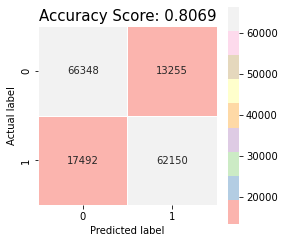

In [99]:
log_matrix = confusion_matrix(y_test, test_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(log_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

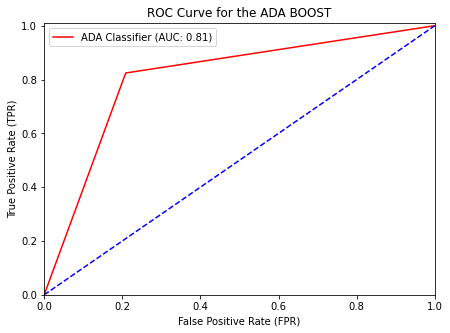

In [100]:
from sklearn.metrics import roc_curve, auc # Importing 'roc_curve' and 'auc' 
fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)
auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='ADA Classifier (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the ADA BOOST')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

**Hyperparameter tuning**

Let's tune the Random Forest, XGBoost to produce better results with fewer errors

In [101]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [25,50]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [102]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 50}

In [103]:
best_grid = grid_search.best_estimator_  #esitmator gives the best values of parameter from grid search
best_grid  

RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=50)

In [104]:
rf_clf = RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=50)
rf_clf.fit(X_train, y_train)
train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [105]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82    238886
         1.0       0.83      0.80      0.81    238847

    accuracy                           0.82    477733
   macro avg       0.82      0.82      0.82    477733
weighted avg       0.82      0.82      0.82    477733
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

         0.0       0.81      0.83      0.82     79603
         1.0       0.82      0.80      0.81     79642

    accuracy                           0.81    159245
   macro avg       0.81      0.81      0.81    159245
weighted avg       0.81      0.81      0.81    159245



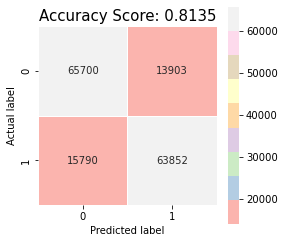

In [106]:
log_matrix = confusion_matrix(y_test, test_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(log_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

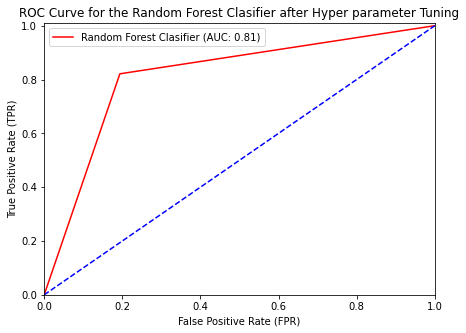

In [107]:
fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)
auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='Random Forest Clasifier (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Random Forest Clasifier after Hyper parameter Tuning')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [108]:
param_grid = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [50,100],
           'colsample_bytree': [0.3, 0.7]}

grid_search = GridSearchCV(estimator = xgb.XGBClassifier(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)         

In [109]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 100}

In [110]:
best_grid = grid_search.best_estimator_  #esitmator gives the best values of parameter from grid search
best_grid 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [111]:
import xgboost as xgb
xg_class = xgb.XGBClassifier(colsample_bytree=0.7, max_depth=10, n_estimators=50)
xg_class.fit(X_train, y_train)
train_y_pred = xg_class.predict(X_train)
test_y_pred = xg_class.predict(X_test)

In [112]:
train_score = metrics.accuracy_score(y_train, train_y_pred) # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred) # Compute test accuracy
train_report = classification_report(y_train, train_y_pred) # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred) # Generate classification report for test data
print('XG Boost Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('XG Boost Classifier Test Classification Report: \n\n', test_report)

XG Boost Classifier Train Classification Report: 

               precision    recall  f1-score   support

         0.0       0.80      0.83      0.81    238886
         1.0       0.82      0.79      0.81    238847

    accuracy                           0.81    477733
   macro avg       0.81      0.81      0.81    477733
weighted avg       0.81      0.81      0.81    477733
 


XG Boost Classifier Test Classification Report: 

               precision    recall  f1-score   support

         0.0       0.80      0.83      0.81     79603
         1.0       0.82      0.79      0.80     79642

    accuracy                           0.81    159245
   macro avg       0.81      0.81      0.81    159245
weighted avg       0.81      0.81      0.81    159245



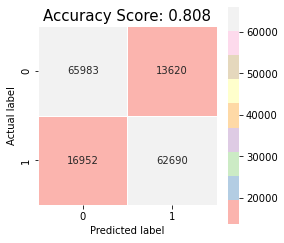

In [113]:
log_matrix = confusion_matrix(y_test, test_y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(log_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

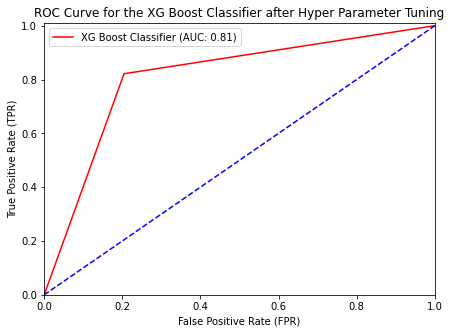

In [114]:
fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)
auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='XG Boost Classifier (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the XG Boost Classifier after Hyper Parameter Tuning')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [115]:
from prettytable import PrettyTable

In [116]:
myTable = PrettyTable(["Model Name", "Train Accuracy", "Test Accuracy","ROC"])
  
# Add rows
myTable.add_row(["Logistic Regression", "79%", "79%","80%"])
myTable.add_row(["K Nearest Neighbour", "78%", "79%","79%"])
myTable.add_row(["Random Forest", "78%", "79%","79%"])
myTable.add_row(["XG Boost ", "80%", "80%","80%"])
myTable.add_row(["ADA Boost", "81%", "81%","80%"])
myTable.add_row(["Decision Tree","82%", "82%", "82%"])
myTable.add_row(["Random Forest(Tuned) ", "82%", "81%","81%"])
myTable.add_row(["XG Boost(Tuned)", "81%", "80%","80%"])

print(myTable)

+-----------------------+----------------+---------------+-----+
|       Model Name      | Train Accuracy | Test Accuracy | ROC |
+-----------------------+----------------+---------------+-----+
|  Logistic Regression  |      79%       |      79%      | 80% |
|  K Nearest Neighbour  |      78%       |      79%      | 79% |
|     Random Forest     |      78%       |      79%      | 79% |
|       XG Boost        |      80%       |      80%      | 80% |
|       ADA Boost       |      81%       |      81%      | 80% |
|     Decision Tree     |      82%       |      82%      | 82% |
| Random Forest(Tuned)  |      82%       |      81%      | 81% |
|    XG Boost(Tuned)    |      81%       |      80%      | 80% |
+-----------------------+----------------+---------------+-----+


## Conclusion
- Decision Tree performed well compared to all the supervised algorithms with 82% accuracy on train and test data. 
- After tuning Random Forest performed well, as it was 82% on the train and 81% on test data. 
- While doing the EDA we observed that, of the parameters selected, 
    The positive parameters, the parameters which can prevent heart disease were high in the females
    The negative parameters which mean the parameters which may lead to a heart attack are high in males
- After seeing the accuracy and f1 score of the algorithms, we confirm that males are having more % of CVDs happening rather than females.

We also tried applying Neural Network and Unsupervised Technique Kmeans on the dataset
- Convolutional Neural Networks has given the best accuracy of 94%
- Kmeans with PCA has given the low accuracy of 51%. Kmeans is not appropriate for our dataset (binary classification)

#### CNN (Convolutional Neural Network)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import pandas as pd
path_to_zip_file = './BRFSS.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall('./')
survey_df = pd.read_csv('brfss2020.csv', low_memory=False)
survey_df.head()
survey_df.shape
survey_selected_df = survey_df[['SEXVAR', '_IMPRACE', '_AGE65YR', 'GENHLTH', '_RFBMI5', '_TOTINDA', '_SMOKER3', 'DRNKANY5', 'DIABETE4', 'CVDSTRK3', 'CVDCRHD4', 'CVDINFR4']]
survey_selected_df.head() #These are the columns which majorily affect the risk of heart desease.
survey_selected_df.rename(columns={'SEXVAR': 'Gender',
                                   '_IMPRACE':'Race', 
                                   '_AGE65YR': 'AGE above 65', 
                                   'GENHLTH' : 'General Health', 
                                   '_RFBMI5': 'Over Weight',
                                   'DRNKANY5':'Alcohol Usage',
                                   '_TOTINDA':'Physical Active Status',
                                   '_SMOKER3':'Smoking',
                                   'DIABETE4':'Diabetes',
                                   'CVDSTRK3':'stroke',
                                   'CVDCRHD4':'Coronary Heart Disease',
                                   'CVDINFR4':'Heart Attack'},inplace=True) 

In [ ]:
survey_selected_df.head()

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Input, LSTM
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa
from tensorflow.keras.utils import plot_model

In [ ]:
survey_selected_df['Heart Attack']=survey_selected_df['Heart Attack']-1

In [ ]:
survey_selected_df.dropna(inplace=True)
survey_selected_df.describe()

In [ ]:
survey_selected_df.dtypes

In [ ]:
features = survey_selected_df.columns[:-1] # Feature names
target = survey_selected_df.columns[-1] # Target name
X = survey_selected_df[features].values # Features
y = survey_selected_df[target].values

In [ ]:
y = survey_selected_df[target]

features
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [ ]:
X_train

In [ ]:
#survey_selected_df.isnull().any()
survey_selected_df.isna().sum()
survey_selected_df.isnull().any()

In [ ]:
def create_model(n_neurons, learning_rate):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim=X_train.shape[1], activation='sigmoid')) # Layer 1 + activation
    model.add(Dense(n_neurons, activation='sigmoid'))   # Layer 2 + activation
    model.add(Dense(n_neurons, activation='sigmoid'))   # Layer 3 + activation
    model.add(Dense(len(y_train.shape)))   # Output layer
    adam = Adam(learning_rate=learning_rate)   # Choice of optimizer
    # Compiling the model by specifying the choice of loss function ('mse'), and performance metrics
    model.compile(loss='mse', optimizer=adam, metrics=['mse','acc', tfa.metrics.r_square.RSquare()])
    return model

In [ ]:
#X_train.shape
y_train.shape

In [ ]:
model = create_model(n_neurons=64, learning_rate=0.001)

In [ ]:
epochs = 5
model_history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(model_history.history['mse'], label = 'train mse')
plt.plot(model_history.history['val_mse'], label = 'test mse')
plt.title('History of the Loss Function of the Model')
plt.legend(['train mse', 'test mse'])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(model_history.history['r_square'], label = 'train r^2')
plt.plot(model_history.history['val_r_square'], label = 'test r^2')
plt.title(r'$R^2$ of the Train and Test Subsets')
plt.legend([r'train $R^2$', r'test $R^2$'])
plt.show()

In [ ]:
accuracy=model_history.history['acc'][-1]
accuracy

In [ ]:
Risk_factor=model.predict([[1,1,1,1,1,1,1,1,1,1,1]])
#>0.5 there is no attack
#risk factor 45%
print(Risk_factor>0.5)
Risk_factor

#### APPENDIX

Let's use unsupervised algorithm on data

### PLEASE RUN THIS CODE IN GOOGLE COLLAB to avoid version issues in KMeans
Error: 'NoneType' object has no attribute 'split' is the possible error in Anaconda Jupiter, it works fine in google collab 

#### K Means Clustering

In [134]:
!pip install kmeans

In [ ]:
from sklearn.utils import shuffle
from sklearn.cluster import KMeans

In [ ]:
X= df_upsampled.drop('Heart Attack',axis=1)
y= df_upsampled['Heart Attack']

In [ ]:
model = KMeans(n_clusters=2, random_state=42) 
kmeans = model.fit(X)

In [ ]:
kmeans.labels_

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y, kmeans.labels_) 

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', 
                ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
correct_labels = sum(y == kmeans.labels_)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Let's use KMeans with PCA for better visualtization of cluster

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(2)
nex_df=pca.fit(X)

In [ ]:
nex_df.explained_variance_ratio_

In [ ]:
X_new=nex_df.transform(X)

In [ ]:
model = KMeans(n_clusters=2, random_state=42) 
kmeans = model.fit(X_new)

In [ ]:
X_new

In [ ]:
kmeans.labels_

In [ ]:
model = KMeans(n_clusters = 2)
label = model.fit_predict(X_new)
centers = np.array(model.cluster_centers_)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(X_new[label == i , 0] , X_new[label == i , 1] , label = i)
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

In [ ]:
correct_labels = sum(y == model.labels_)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

In [ ]:
myUnsupervisedTable = PrettyTable(["Model Name", "Accuracy"])
  
# Add rows
myUnsupervisedTable.add_row(["K Means", "49%"])
myUnsupervisedTable.add_row(["K Means with PCA", "51%"])

print(myUnsupervisedTable)

After using PCA, the accuracy was increased from 49% to 51%.

The End!